In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

#Define registers and a quantum circuit
q = QuantumRegister(4)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)

def full_adder(circ, a, b, cin, cout, c):
    circ.ccx(a, b, cout)
    circ.cx(a, b)
    circ.ccx(b, cin, cout)
    circ.cx(b, cin)
    circ.cx(a, b)
    circ.measure(cin, c[0])
    circ.measure(cout,c[1])
    return circ
full_adder(qc, q[0], q[1], q[2], q[3], c)    


backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

{'00': 1000}


<Figure size 650.494x451.5 with 1 Axes>

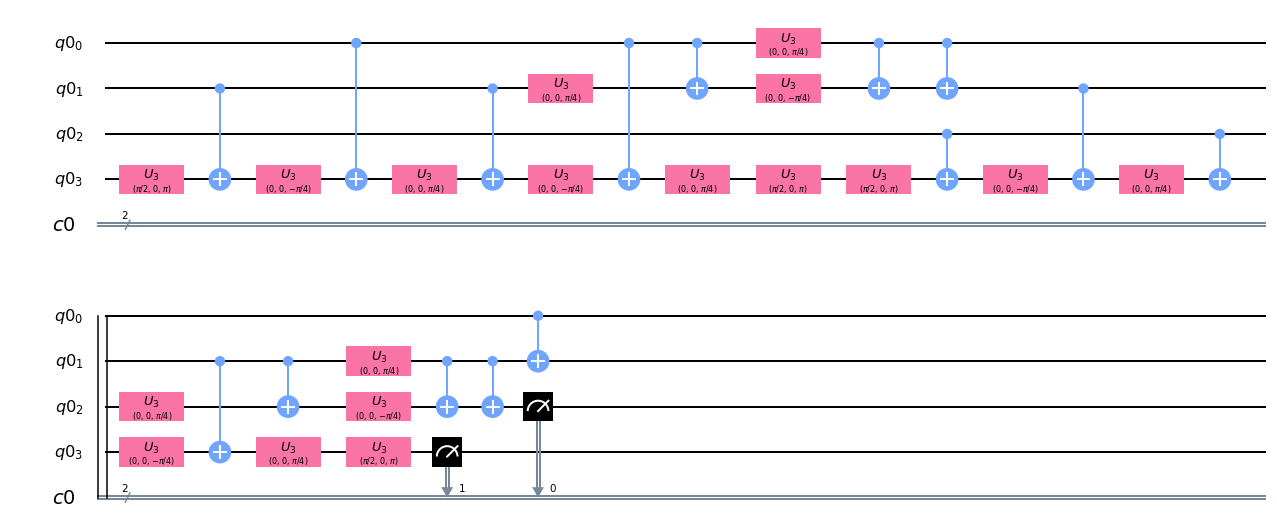

In [2]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
#now let's check the quantum cost of this circuit by using the Unroller.
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [3]:
new_circuit.count_ops()

OrderedDict([('u3', 18), ('cx', 15), ('measure', 2)])

In [4]:
import json
dct = new_circuit.count_ops()
with open('wk1_output.txt', 'w') as f:
    f.write(json.dumps(dct))